In [2]:
%matplotlib inline
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib import patches as mpatches

import glob
import numpy as np
import os
import scipy

%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(1, '../code')
import plotter
import utils
from utils import *
import plotter

%matplotlib inline
#sys.path.insert(1, '../../clust')
#import clustering_statistics as cs

In [18]:
plot_dir = '../plots/plots_2023-09-19'

In [3]:
statistics = ['wp', 'xi', 'xi2', 'upf', 'mcf']
stat_strs_single = np.loadtxt('../tables/statistic_sets_single.txt', dtype=str)
stat_strs_addin = np.loadtxt('../tables/statistic_sets_addin.txt', dtype=str)
stat_strs_addin_full = np.concatenate((['wp'], stat_strs_addin))
stat_strs_scale = np.concatenate((stat_strs_single, 
                                 ['xi_xi2', 'wp_xi_xi2', 'wp_xi_xi2_mcf', 'wp_xi_xi2_upf_mcf']))

params_keydeliverable = ['Omega_m', 'sigma_8', 'f', 'fsigma8']
params_keycosmo = ['Omega_m', 'sigma_8', 'f']
params_keyhodab = ['M_sat', 'v_bs', 'f_env']
params_keymix = ['Omega_m', 'sigma_8', 'f', 'M_sat', 'v_bs', 'f_env']

id_pairs_test = np.loadtxt('../tables/id_pairs_recovery_test_70.txt', delimiter=',', dtype=np.int)

labels_single = [
                 make_label('wp'),
                 make_label('xi'),
                 make_label('xi2'),
                 make_label('upf'),
                 make_label('mcf')
                ]
labels_addin = [
                 make_label('wp'),
                 '+'+make_label('xi'),
                 '+'+make_label('xi2'),
                 '+'+make_label('upf'),
                 '+'+make_label('mcf'),
                ]
labels_addin_full = [
                 make_label('wp'),
                 make_label(['wp', 'xi']),
                 make_label(['wp', 'xi', 'xi2']),
                 make_label(['wp', 'xi', 'xi2', 'upf']),
                 make_label(['wp', 'xi', 'xi2', 'upf', 'mcf'])
                ]
labels_scale = np.concatenate((labels_single, 
                               [make_label(['xi', 'xi2']),
                                make_label(['wp', 'xi', 'xi2']),
                                make_label(['wp', 'xi', 'xi2', 'mcf']),
                                make_label(['wp', 'xi', 'xi2', 'upf', 'mcf'])]))


colors_single = ['#73B9F3', '#2B66CE', '#31D8BF', '#FFB142', '#F97FF0']
colors_addin = ['#73B9F3', '#8973F5', '#952DAD', '#D81471', '#B70D0D']
colors_scale = np.concatenate((colors_single, 
                               ['navy', colors_addin[2], '#ff33b4', colors_addin[-1]]))
colors_cov = ['#7B767B', colors_addin[-1]]

# fix gammaf tests

In [3]:
id_pairs = np.loadtxt('../tables/id_pairs_recovery_test_70.txt', delimiter=',', dtype=np.int)

In [4]:
results_dict_dir = '../data_products/results_dicts'

In [5]:
chaintag_prior = 'prior'
prior_dict = utils.construct_results_dict(chaintag_prior)

In [6]:
fn_results_dict_addin_full = f'{results_dict_dir}/results_dict_addin_full.npy'
results_dict_addin_full = np.load(fn_results_dict_addin_full, allow_pickle=True).item()

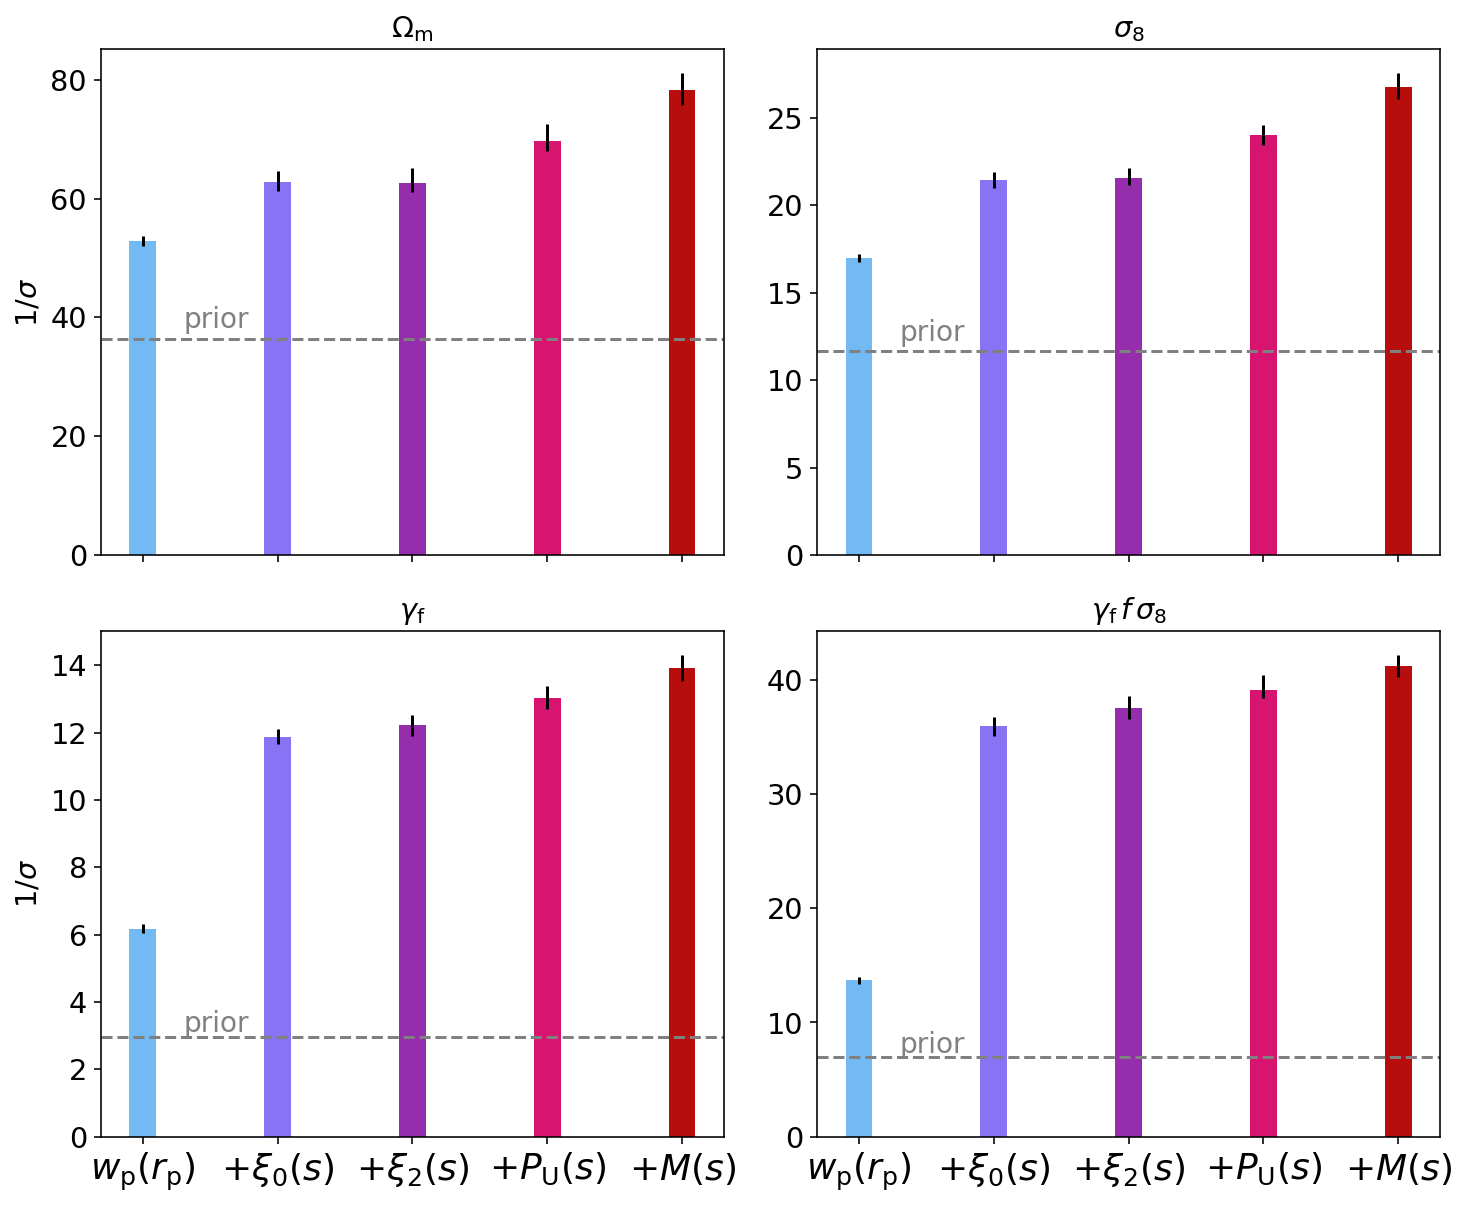

In [7]:
plotter.plot_uncertainty_figure(results_dict_addin_full, prior_dict, params_keydeliverable, stat_strs_addin_full, 
                                id_pairs, labels_addin, colors_addin)

In [8]:
results_dict_wpinfo = defaultdict(dict)

stat_strs = ['xi_xi2', 'wp_xi_xi2']
for stat_str in stat_strs:
    print(stat_str)
    for i, id_pair in enumerate(id_pairs):
        
        id_cosmo, id_hod = id_pair
        chaintag = f'{stat_str}_aemulus_fmaxmocks_test_c{id_cosmo}h{id_hod}_minscale0'
        result_dict_single = utils.construct_results_dict(chaintag)
        results_dict_wpinfo[stat_str][tuple(id_pair)] = result_dict_single

xi_xi2
wp_xi_xi2


In [9]:
results_dict_wpinfo_fixgammaf = defaultdict(dict)

stat_strs = ['xi_xi2', 'wp_xi_xi2']
for stat_str in stat_strs:
    print(stat_str)
    for i, id_pair in enumerate(id_pairs):
        
        id_cosmo, id_hod = id_pair
        chaintag = f'{stat_str}_aemulus_fmaxmocks_test_c{id_cosmo}h{id_hod}_fixgammaf_minscale0'
        result_dict_single = utils.construct_results_dict(chaintag)
        #print(result_dict_single.keys())
        #break
        results_dict_wpinfo_fixgammaf[stat_str][tuple(id_pair)] = result_dict_single

xi_xi2
wp_xi_xi2


In [10]:
utils.print_uncertainty_results(results_dict_wpinfo, ['Omega_m', 'sigma_8', 'fsigma8'], 
                                         id_pairs, prior_dict)

dict_keys(['xi_xi2', 'wp_xi_xi2'])
Omega_m
Prior: 0.0275
xi_xi2: 0.0196
wp_xi_xi2: 0.0160

sigma_8
Prior: 0.0859
xi_xi2: 0.0588
wp_xi_xi2: 0.0464

fsigma8
Prior: 0.1429
xi_xi2: 0.0434
wp_xi_xi2: 0.0266



In [11]:
print((0.0434-0.0266)/0.0434)
print((0.0434-0.0266)/0.0266)

0.38709677419354843
0.6315789473684211


In [12]:
utils.print_uncertainty_results(results_dict_wpinfo_fixgammaf, ['Omega_m', 'sigma_8', 'fsigma8'], 
                                         id_pairs, prior_dict)

dict_keys(['xi_xi2', 'wp_xi_xi2'])
Omega_m
Prior: 0.0275
xi_xi2: 0.0174
wp_xi_xi2: 0.0142

sigma_8
Prior: 0.0859
xi_xi2: 0.0414
wp_xi_xi2: 0.0307

fsigma8
Prior: 0.1429
xi_xi2: 0.0199
wp_xi_xi2: 0.0157



In [13]:
print((0.0199-0.0157)/0.0199)
print((0.0199-0.0157)/0.0157)

0.21105527638190966
0.26751592356687914


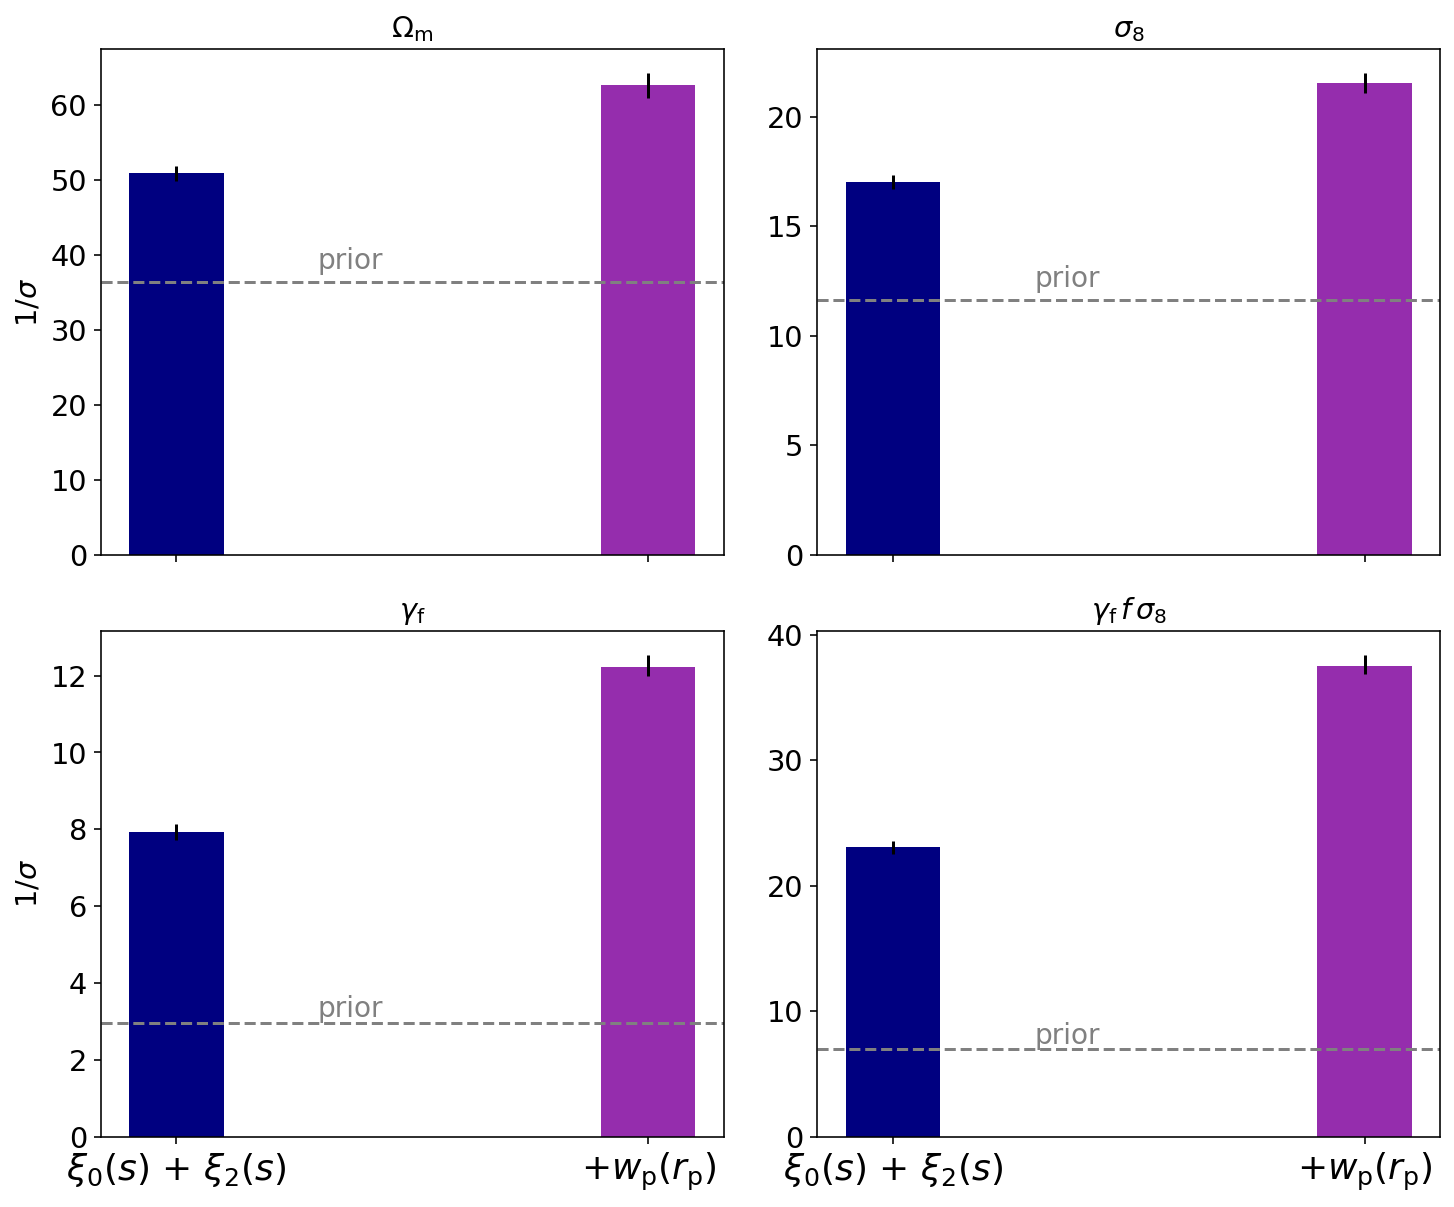

In [14]:
plotter.plot_uncertainty_figure(results_dict_wpinfo, prior_dict, ['Omega_m', 'sigma_8', 'f', 'fsigma8'], stat_strs, 
                                id_pairs, [labels_scale[5], '+'+labels_single[0]], colors_scale[5:7])

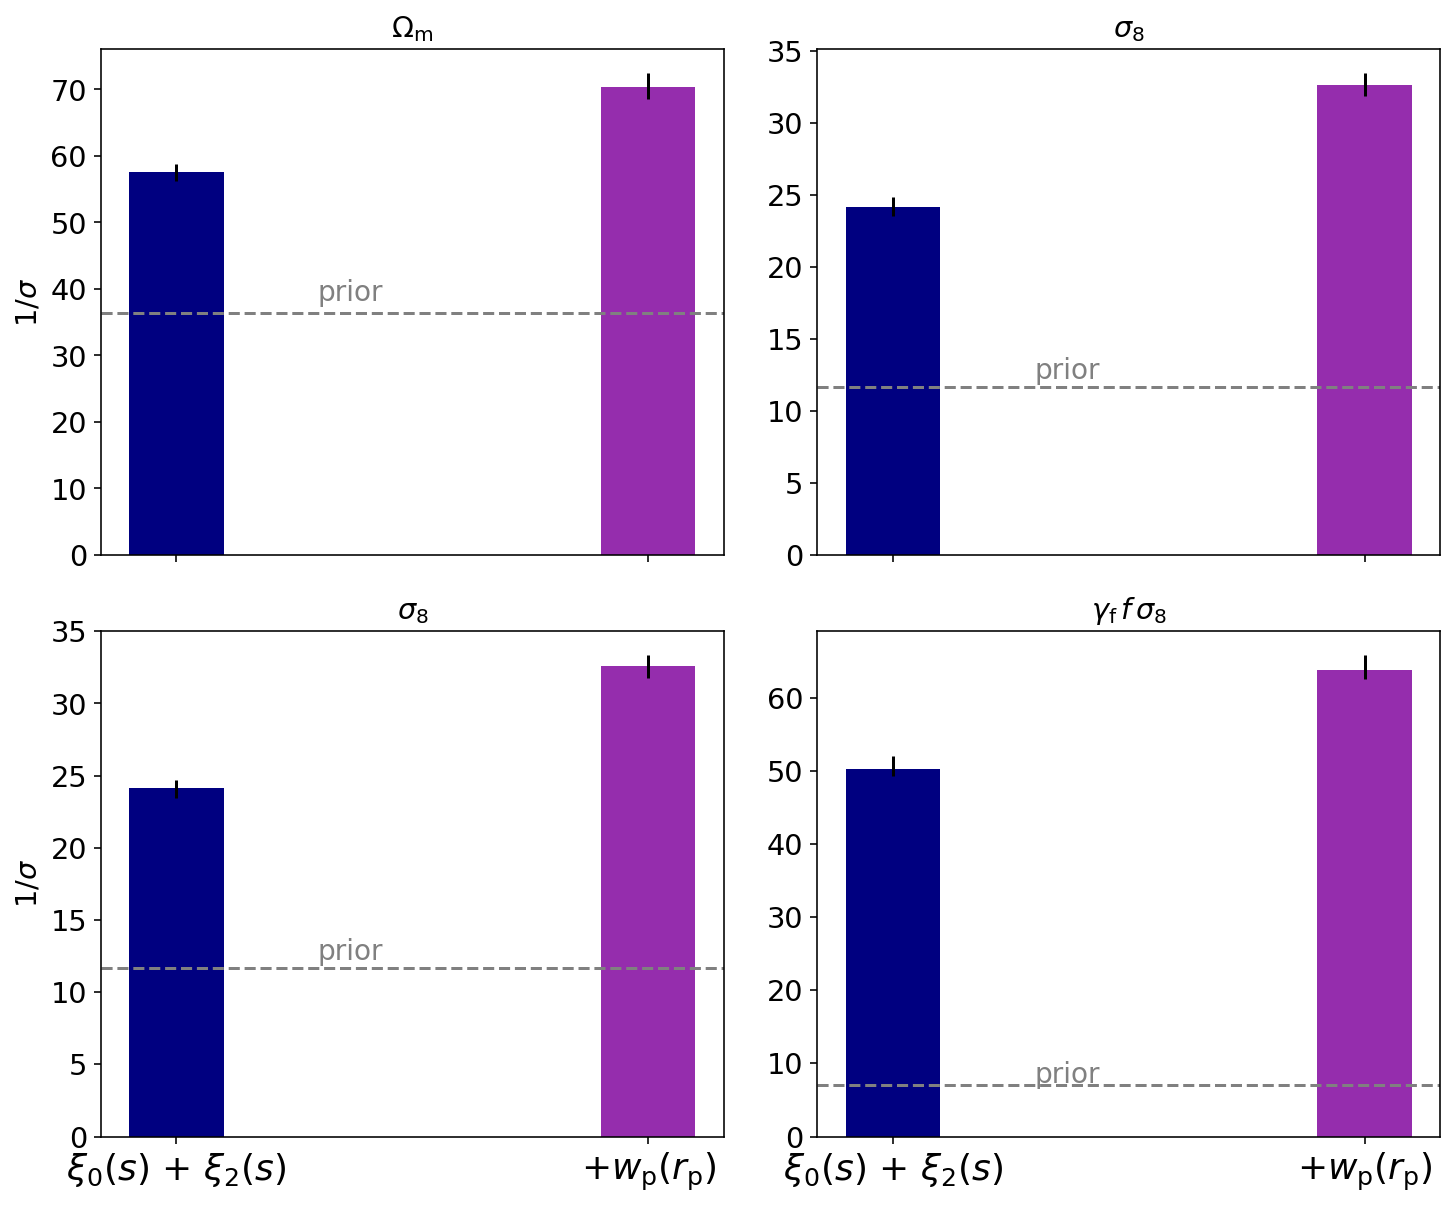

In [15]:
plotter.plot_uncertainty_figure(results_dict_wpinfo_fixgammaf, prior_dict, ['Omega_m', 'sigma_8', 'sigma_8', 'fsigma8'], stat_strs, 
                                id_pairs, [labels_scale[5], '+'+labels_single[0]], colors_scale[5:7])

# number density tests

In [9]:
mock_name_train = 'aemulus_fmaxmocks_train'
mock_tag_train = '_'+mock_name_train
training_dir_base = f'/mount/sirocco1/ksf293/clust/results{mock_tag_train}'
id_pairs_train = np.loadtxt('../tables/id_pairs_train.txt', delimiter=',', dtype=int)

In [10]:
cosmo, hod = 6,69

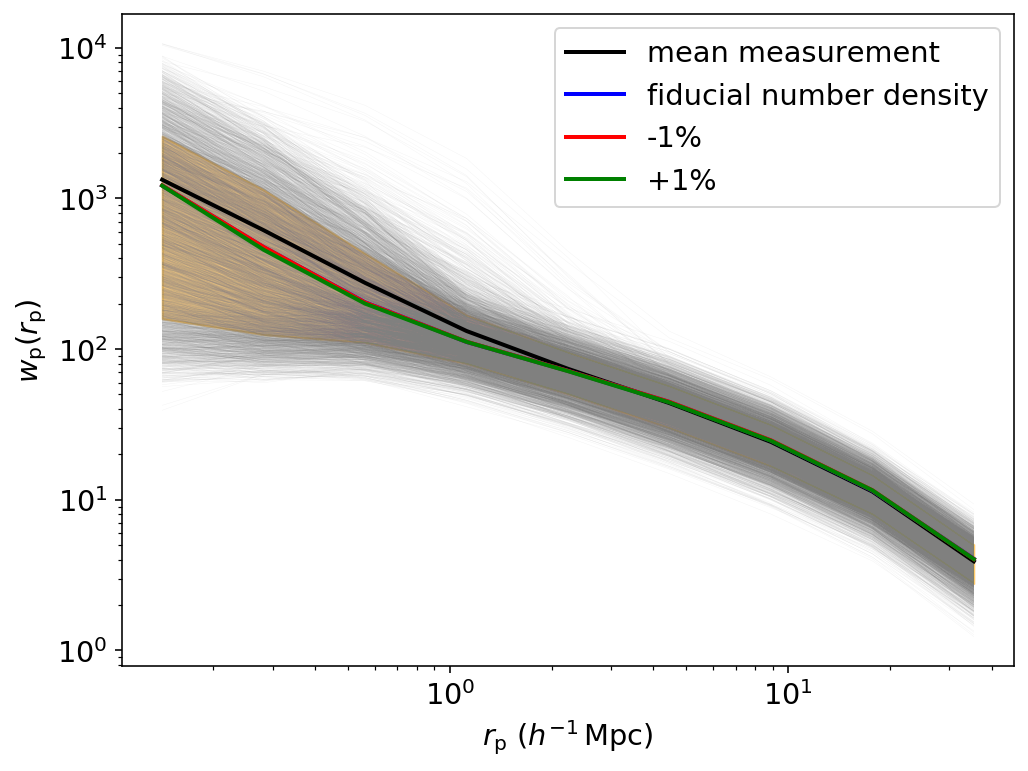

In [36]:
%matplotlib inline
statistic = 'wp'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

data_name = 'aemulus_fmaxmocks_test'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='blue', label='fiducial number density')

data_name = 'aemulus_fmaxmocks_test_minus1'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='red', label='-1%')

data_name = 'aemulus_fmaxmocks_test_plus1'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='green', label='+1%')
plt.legend()

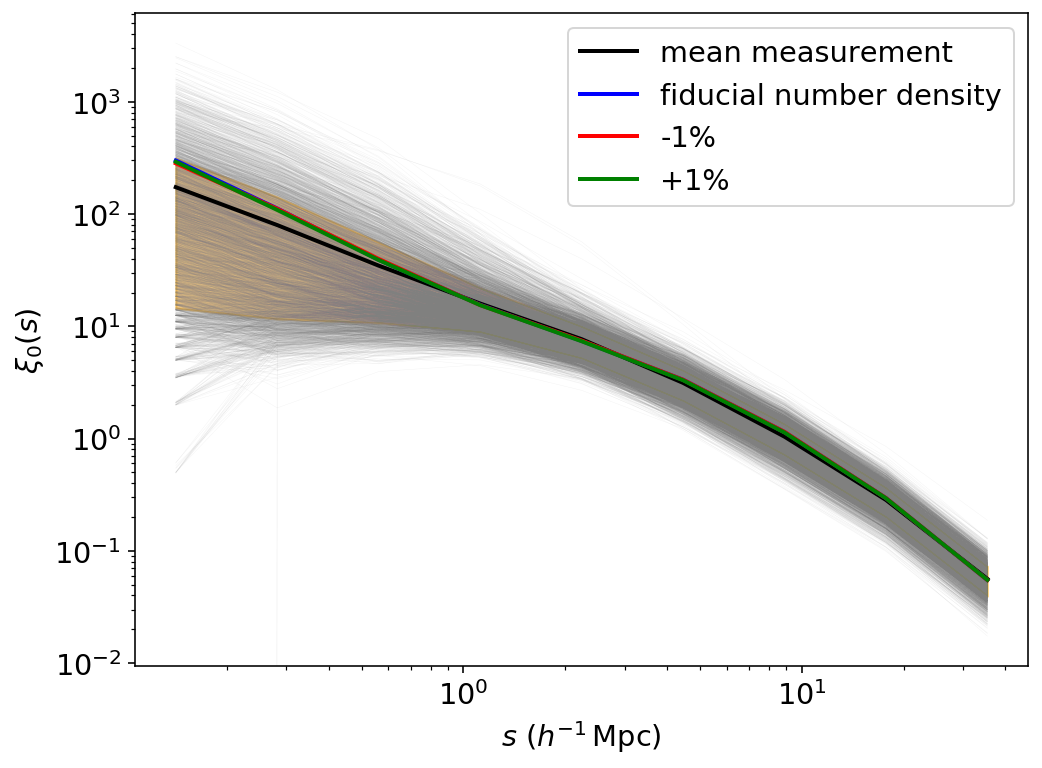

In [37]:
%matplotlib inline
statistic = 'xi'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

data_name = 'aemulus_fmaxmocks_test'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='blue', label='fiducial number density')

data_name = 'aemulus_fmaxmocks_test_minus1'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='red', label='-1%')

data_name = 'aemulus_fmaxmocks_test_plus1'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='green', label='+1%')
plt.legend()

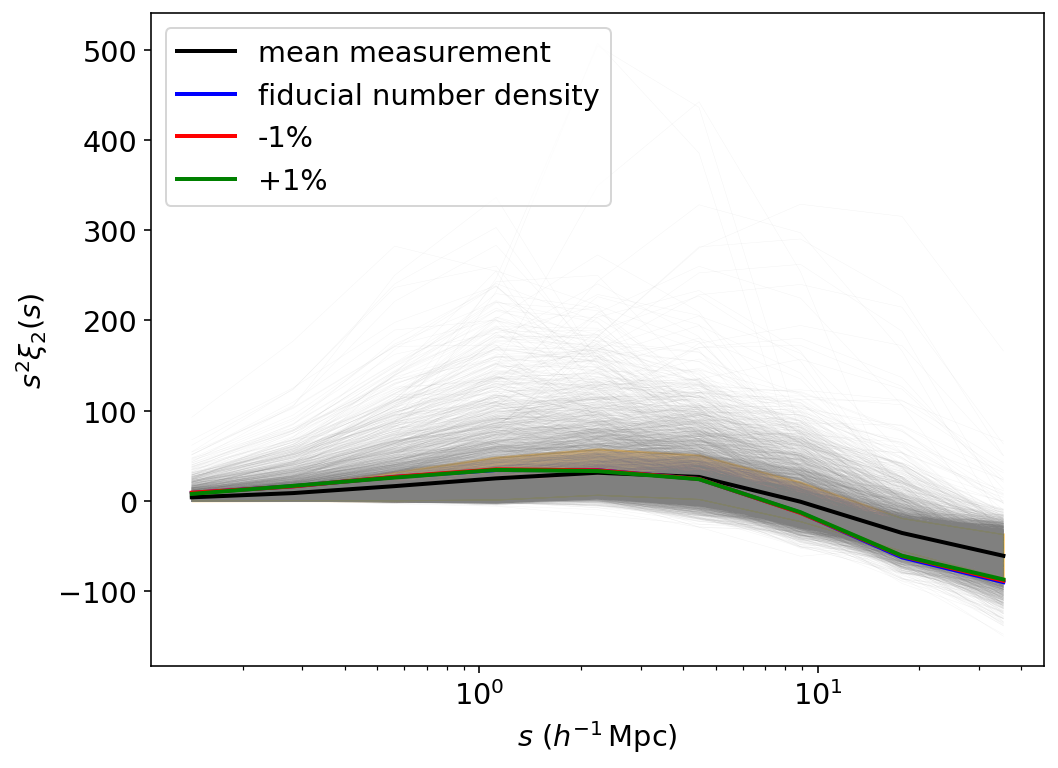

In [38]:
%matplotlib inline
statistic = 'xi2'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

data_name = 'aemulus_fmaxmocks_test'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, x_vals**2 * y_vals, lw=2, color='blue', label='fiducial number density')

data_name = 'aemulus_fmaxmocks_test_minus1'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, x_vals**2 * y_vals, lw=2, color='red', label='-1%')

data_name = 'aemulus_fmaxmocks_test_plus1'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, x_vals**2 * y_vals, lw=2, color='green', label='+1%')
plt.legend()

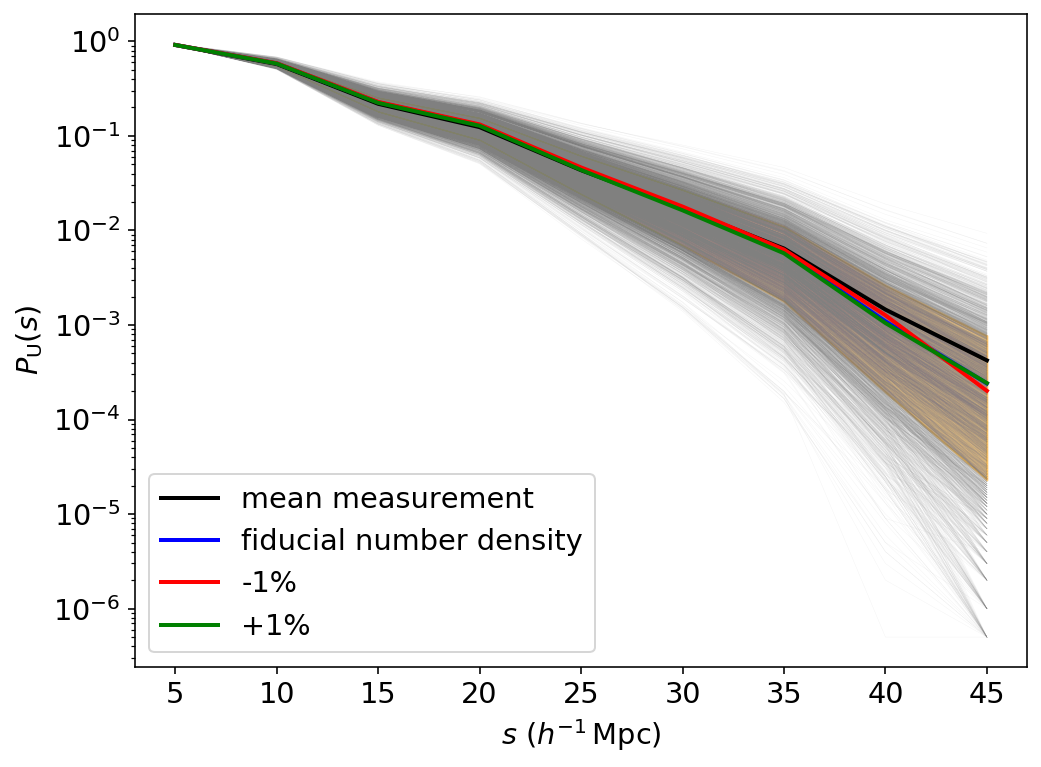

In [40]:
%matplotlib inline
statistic = 'upf'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

data_name = 'aemulus_fmaxmocks_test'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='blue', label='fiducial number density')

data_name = 'aemulus_fmaxmocks_test_minus1'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='red', label='-1%')

data_name = 'aemulus_fmaxmocks_test_plus1'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='green', label='+1%')
plt.legend()

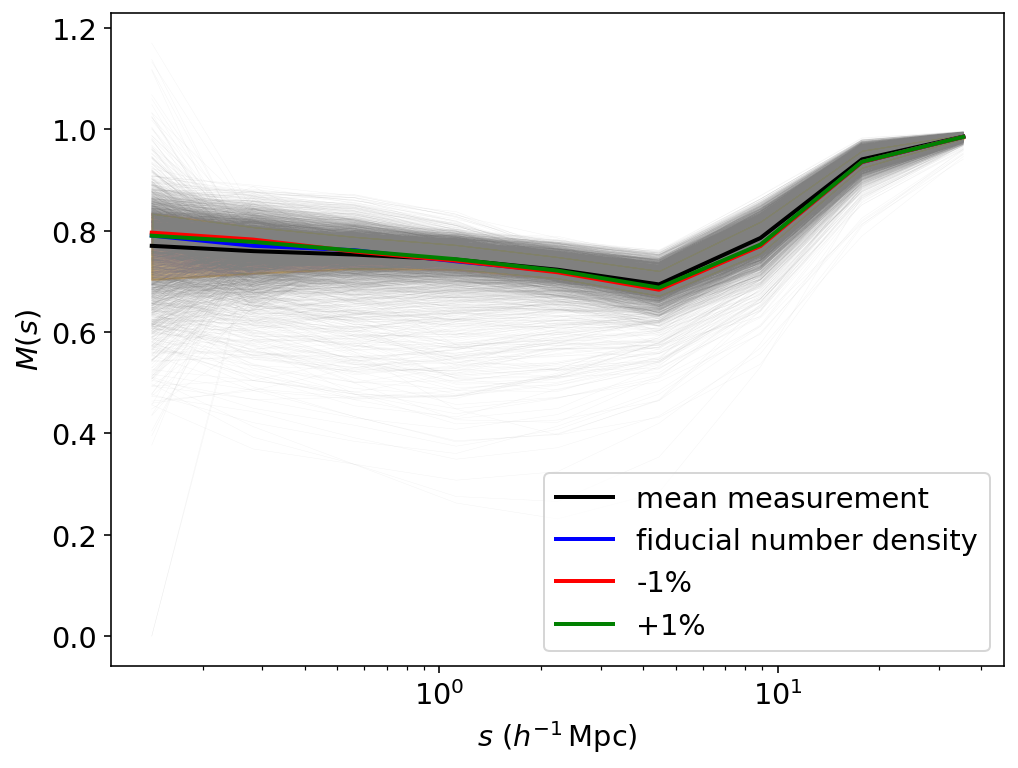

In [39]:
%matplotlib inline
statistic = 'mcf'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

data_name = 'aemulus_fmaxmocks_test'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='blue', label='fiducial number density')

data_name = 'aemulus_fmaxmocks_test_minus1'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='red', label='-1%')

data_name = 'aemulus_fmaxmocks_test_plus1'
result_dir=f"/mount/sirocco1/ksf293/clust/results_{data_name}_mean/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}_cosmo_{cosmo}_HOD_{hod}_mean.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='green', label='+1%')
plt.legend()

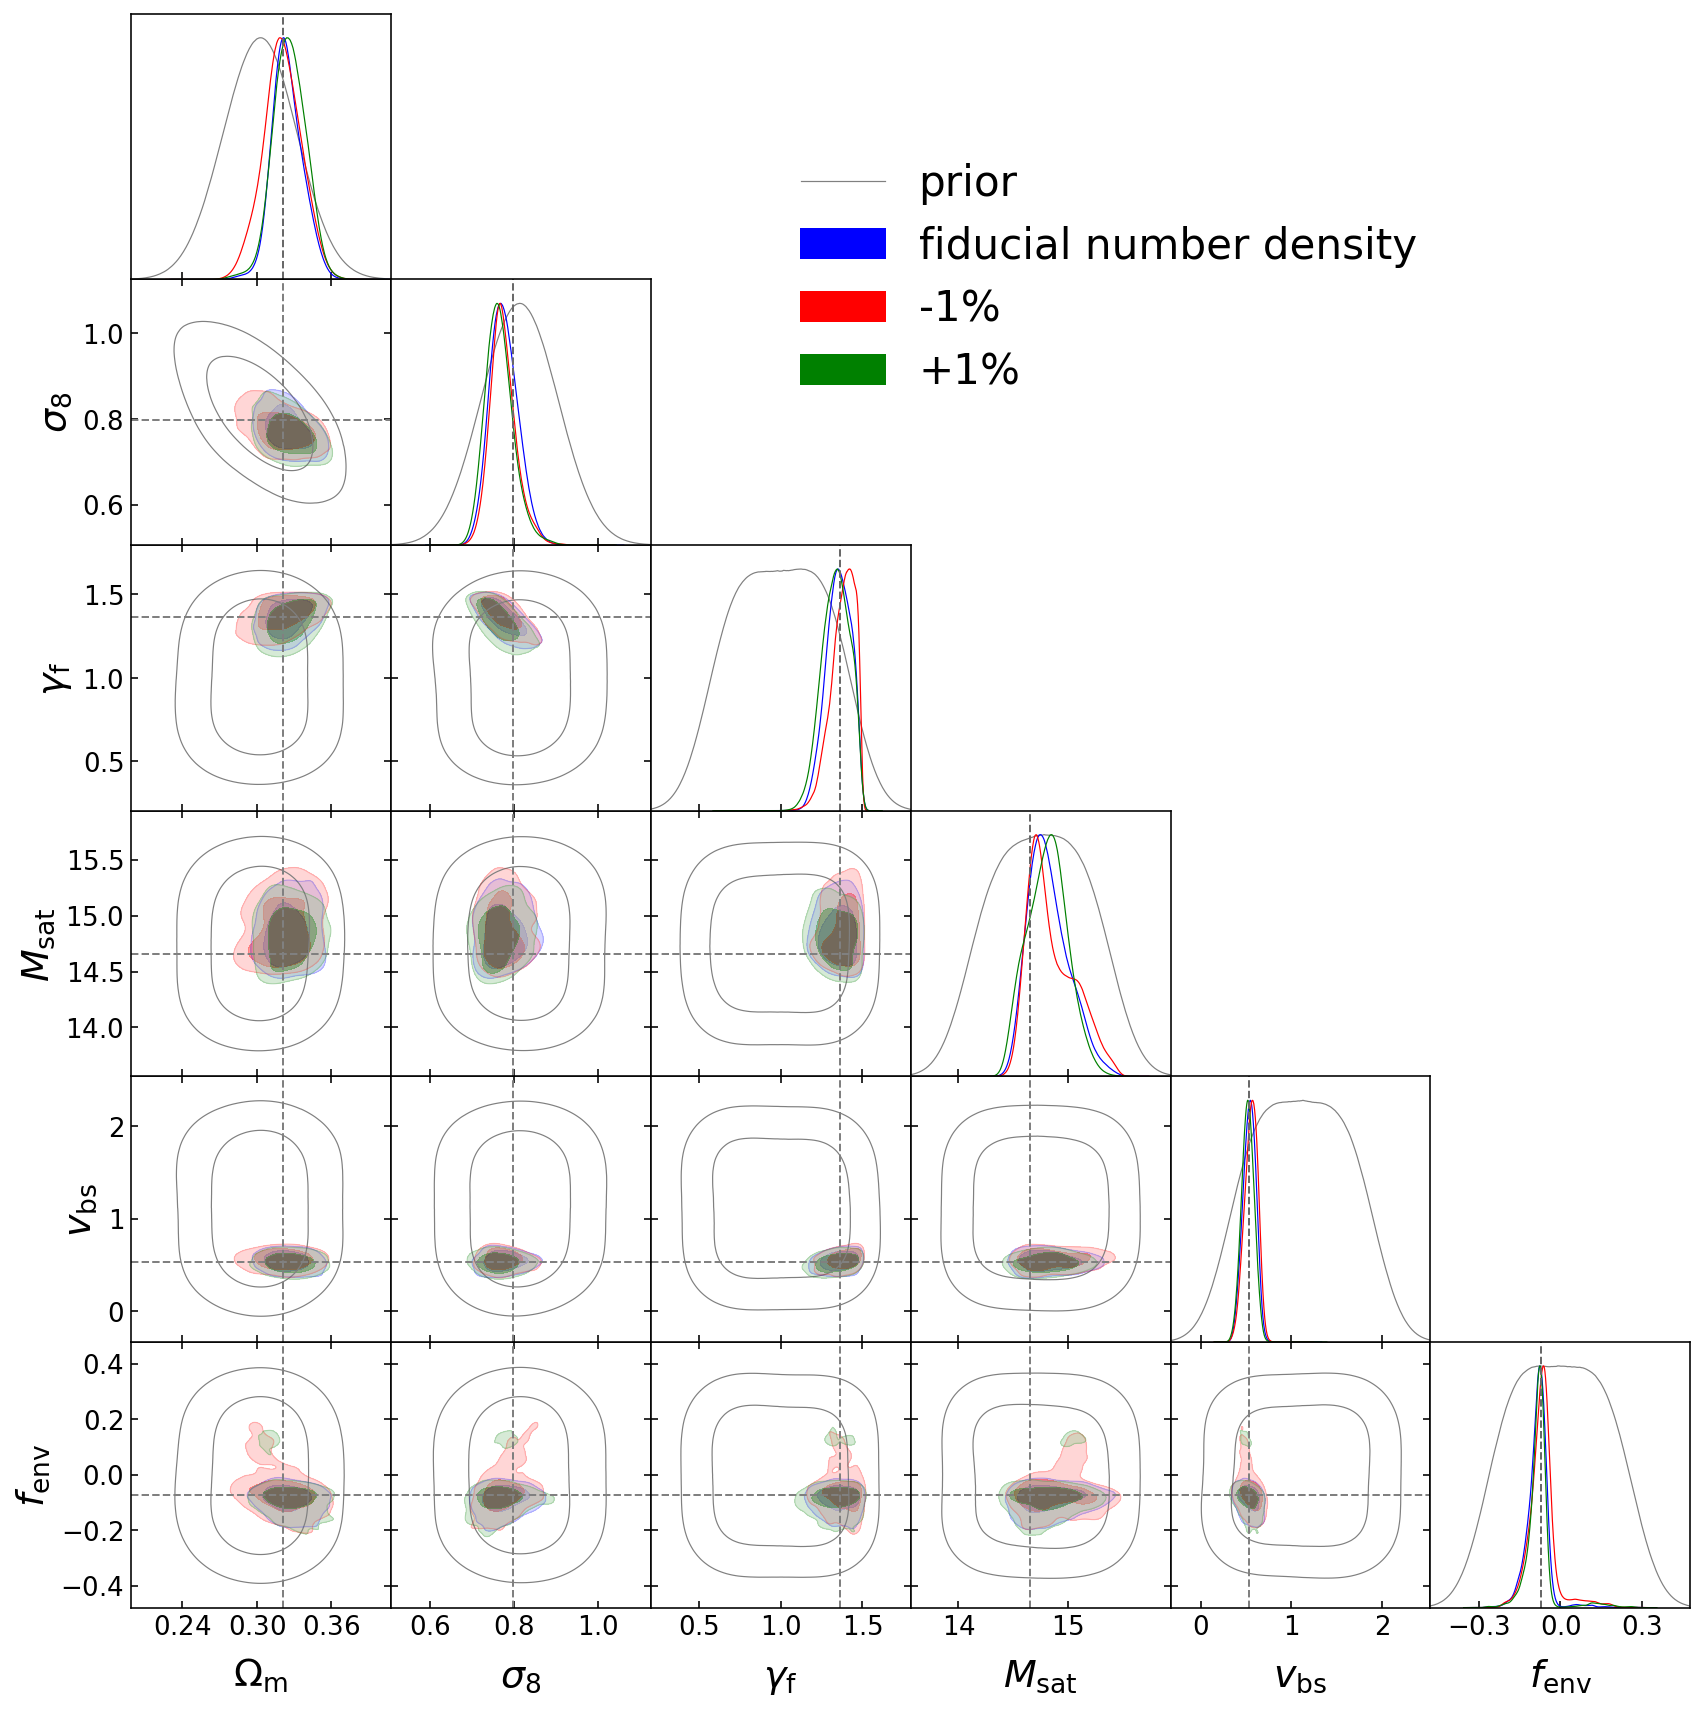

In [21]:
data_name = 'aemulus_fmaxmocks_test'
chaintags = [
             f'wp_xi_xi2_upf_mcf_aemulus_fmaxmocks_test_c{cosmo}h{hod}_minscale0_wpximaxscale6',
             f'wp_xi_xi2_upf_mcf_aemulus_fmaxmocks_test_minus1_c{cosmo}h{hod}_minscale0_wpximaxscale6',
             f'wp_xi_xi2_upf_mcf_aemulus_fmaxmocks_test_plus1_c{cosmo}h{hod}_minscale0_wpximaxscale6',
            ]
labels = ['fiducial number density', '-1%', '+1%']
g = plotter.plot_contours(chaintags, colors=['blue', 'red', 'green'],
                          legend_labels=labels, 
                          #legend_loc=(0.56, 0.8),
                          legend_loc=(0.46, 0.76),
                          legend_fontsize=24,
                          params_toplot=params_keymix,
                          chaintag_prior='prior')
plt.savefig(f'{plot_dir}/number_density_test_contours.pdf')

In [11]:
data_name = 'aemulus_fmaxmocks_test'
results_dict_numdens = defaultdict(dict)

stat_strs = ['wp_xi_xi2_upf_mcf']
for stat_str in stat_strs:
    chaintag = f'{stat_str}_{data_name}_c{cosmo}h{hod}_minscale0_wpximaxscale6'
    results_dict_numdens[stat_str] = utils.construct_results_dict(chaintag)

In [12]:
data_name = 'aemulus_fmaxmocks_test_minus1'
results_dict_numdens_minus = defaultdict(dict)

stat_strs = ['wp_xi_xi2_upf_mcf']
for stat_str in stat_strs:
    chaintag = f'{stat_str}_{data_name}_c{cosmo}h{hod}_minscale0_wpximaxscale6'
    results_dict_numdens_minus[stat_str] = utils.construct_results_dict(chaintag)

In [13]:
data_name = 'aemulus_fmaxmocks_test_plus1'
results_dict_numdens_plus = defaultdict(dict)

stat_strs = ['wp_xi_xi2_upf_mcf']
for stat_str in stat_strs:
    chaintag = f'{stat_str}_{data_name}_c{cosmo}h{hod}_minscale0_wpximaxscale6'
    results_dict_numdens_plus[stat_str] = utils.construct_results_dict(chaintag)

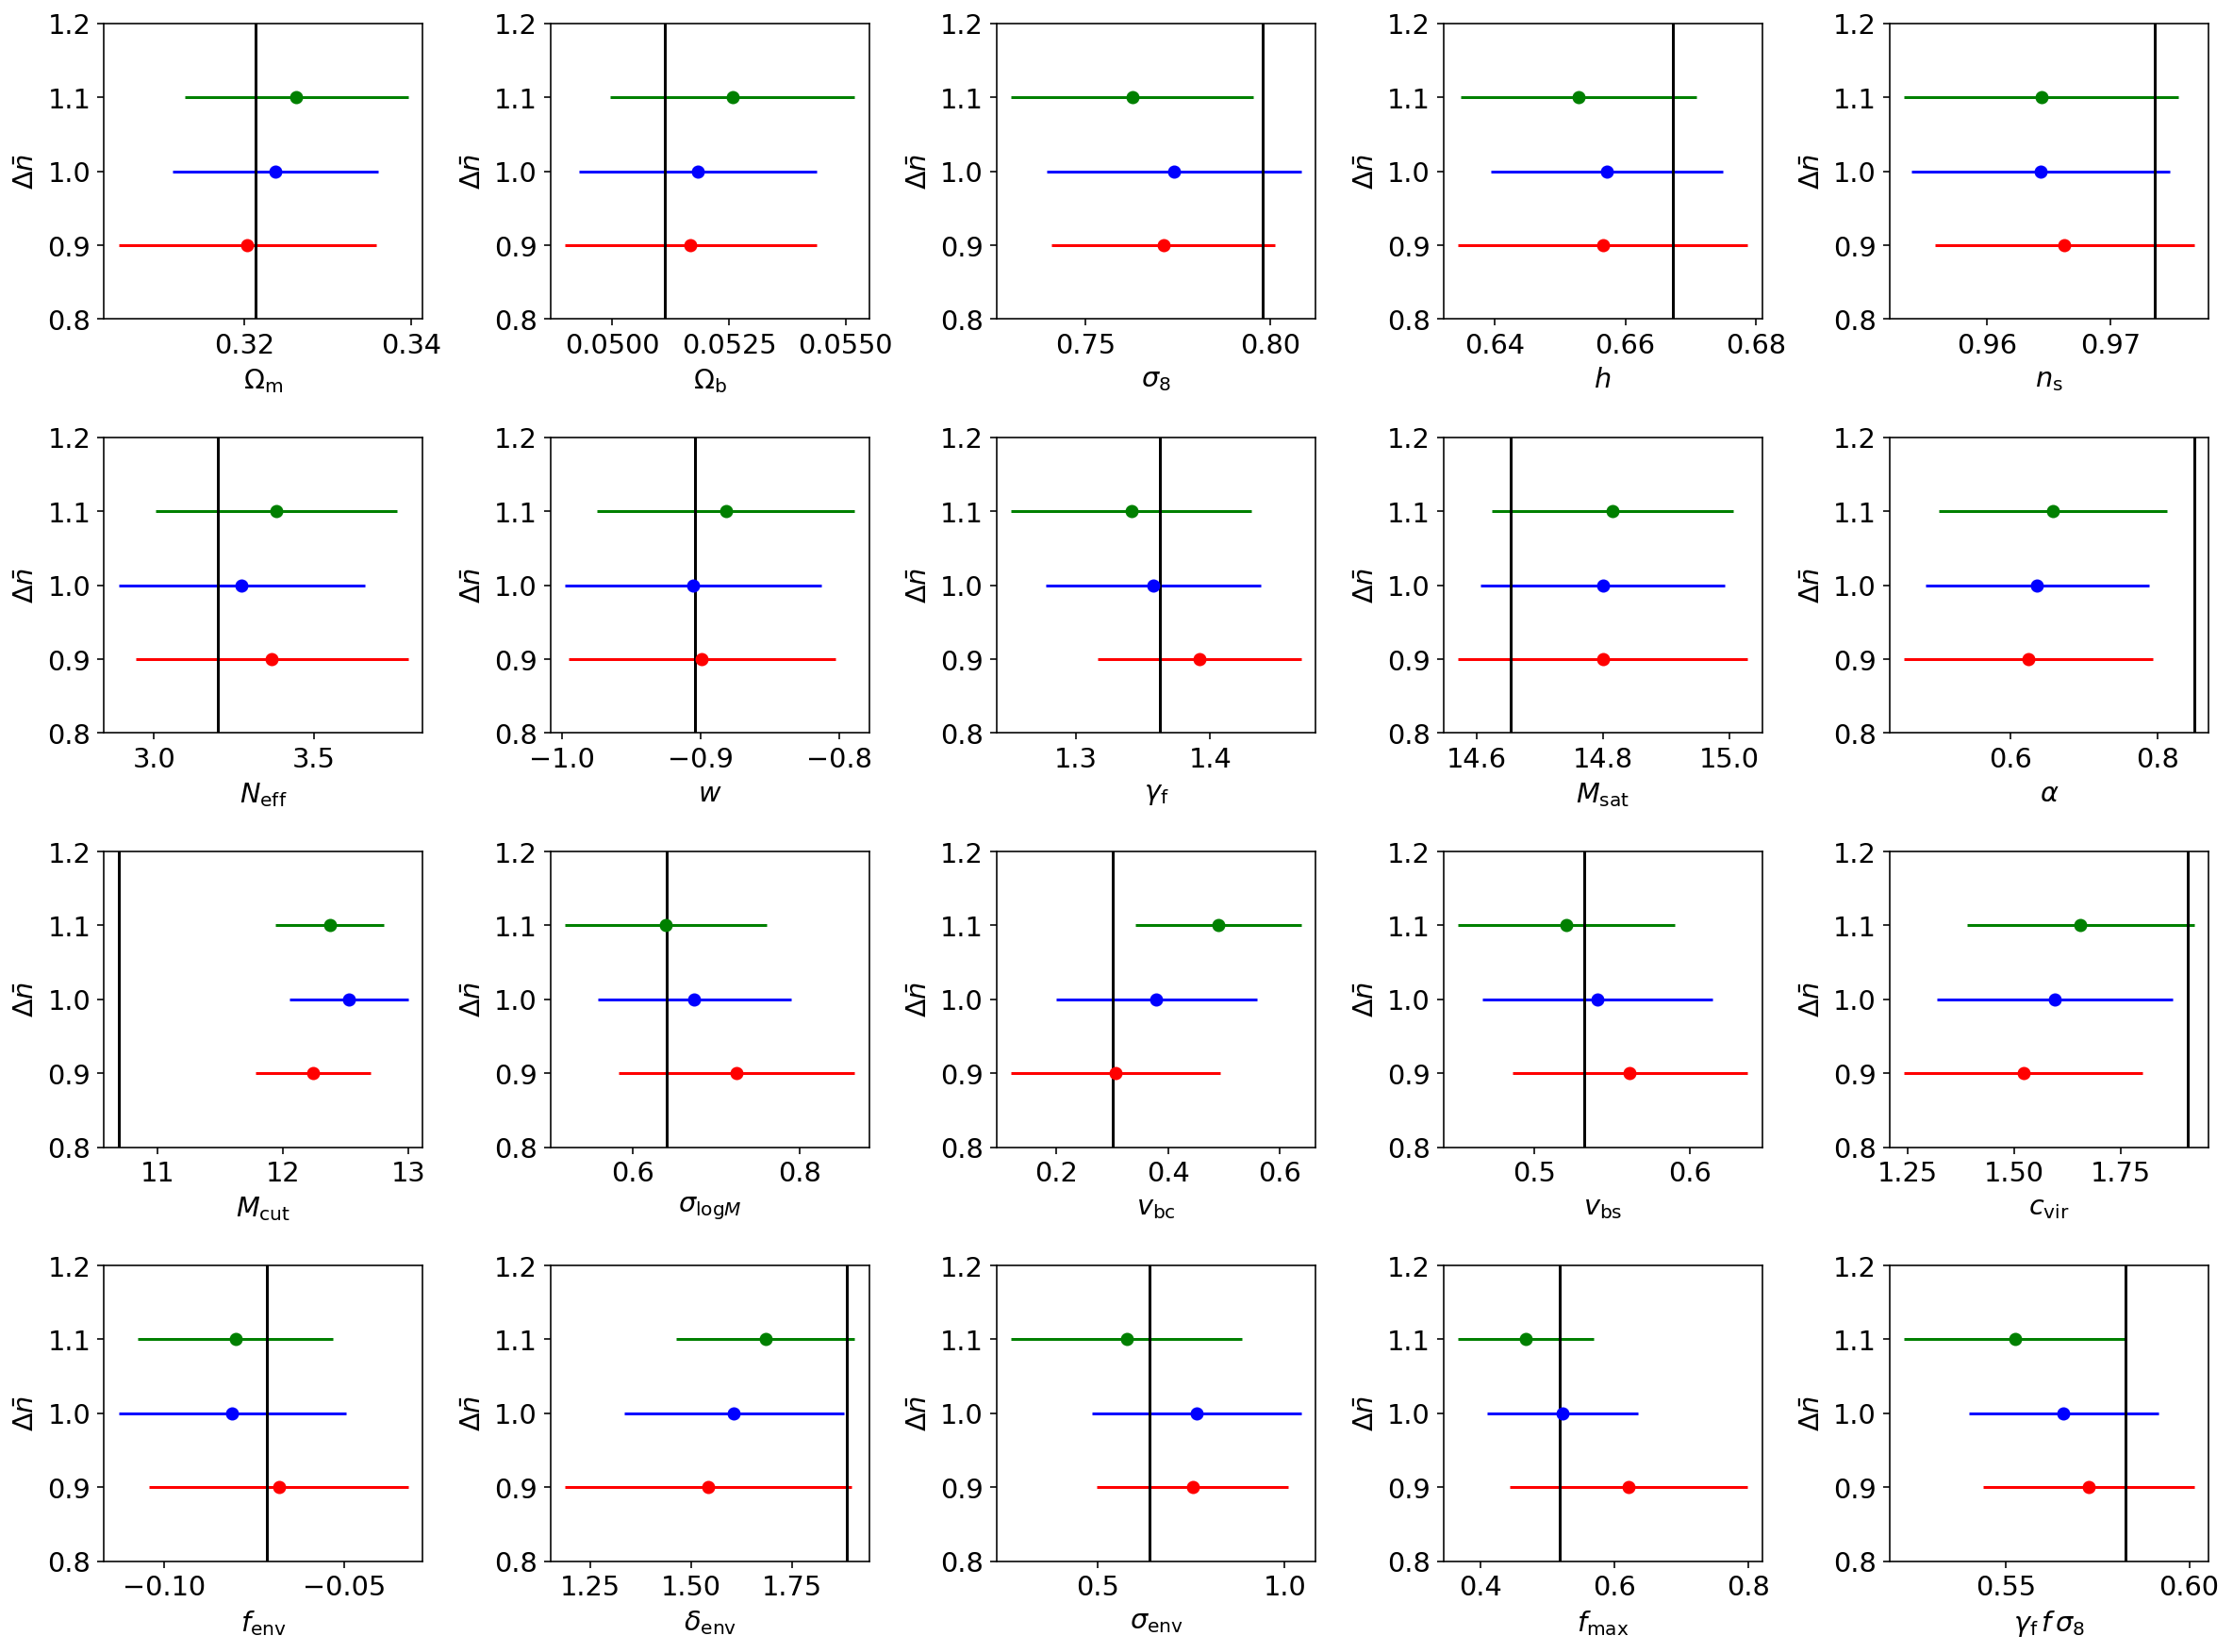

In [20]:
stat_str = 'wp_xi_xi2_upf_mcf'

param_names_toplot = param_names_freorder + ['fsigma8']

nrows, ncols = 4, 5
fig, axarr = plt.subplots(nrows, ncols, figsize=(20, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
count = 0

diffs_sigma_minus = []
diffs_sigma_plus = []
for i in range(nrows):
    for j in range(ncols):
        ax = axarr[i,j]
        
        
        param_name = param_names_toplot[count]

        ax.errorbar(results_dict_numdens[stat_str][param_name]['median'], 1,
                    xerr=results_dict_numdens[stat_str][param_name]['uncertainty'],
                    marker='o', color='blue')
        ax.errorbar(results_dict_numdens_minus[stat_str][param_name]['median'], 0.9,
            xerr=results_dict_numdens_minus[stat_str][param_name]['uncertainty'],
            marker='o', color='red')
        ax.errorbar(results_dict_numdens_plus[stat_str][param_name]['median'], 1.1,
            xerr=results_dict_numdens_plus[stat_str][param_name]['uncertainty'],
            marker='o', color='green')
        
        diff_minus = results_dict_numdens_minus[stat_str][param_name]['median'] - results_dict_numdens[stat_str][param_name]['median']
        diffs_sigma_minus.append(diff_minus/results_dict_numdens[stat_str][param_name]['uncertainty'])
        diff_plus = results_dict_numdens_plus[stat_str][param_name]['median'] - results_dict_numdens[stat_str][param_name]['median']
        diffs_sigma_plus.append(diff_plus/results_dict_numdens[stat_str][param_name]['uncertainty'])
                
        ax.axvline(results_dict_numdens[stat_str][param_name]['truth'], color='black')
                      
        ax.set_xlabel(rf'${param_labels[param_name]}$')
        ax.set_ylabel(r'$\Delta \bar{n}$')
                      
        ax.set_ylim(0.8, 1.2)
                      
        count += 1
        
plt.savefig(f'{plot_dir}/number_density_test_parameters.pdf')

In [17]:
print(np.median(np.abs(diffs_sigma_minus)), np.min(np.abs(diffs_sigma_minus)), np.max(np.abs(diffs_sigma_minus)))
print(np.median(np.abs(diffs_sigma_plus)), np.min(np.abs(diffs_sigma_plus)), np.max(np.abs(diffs_sigma_plus)))

0.25568967036841717 0.0002714278600129197 0.8735590069447579
0.2750497412067955 0.0036147676238395495 0.6656172502866127


### Covariance amplitude comparison

In [51]:
errtag = '_hod3_test0'
cov_dir = '../covariances'    

/home/users/ksf293/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt


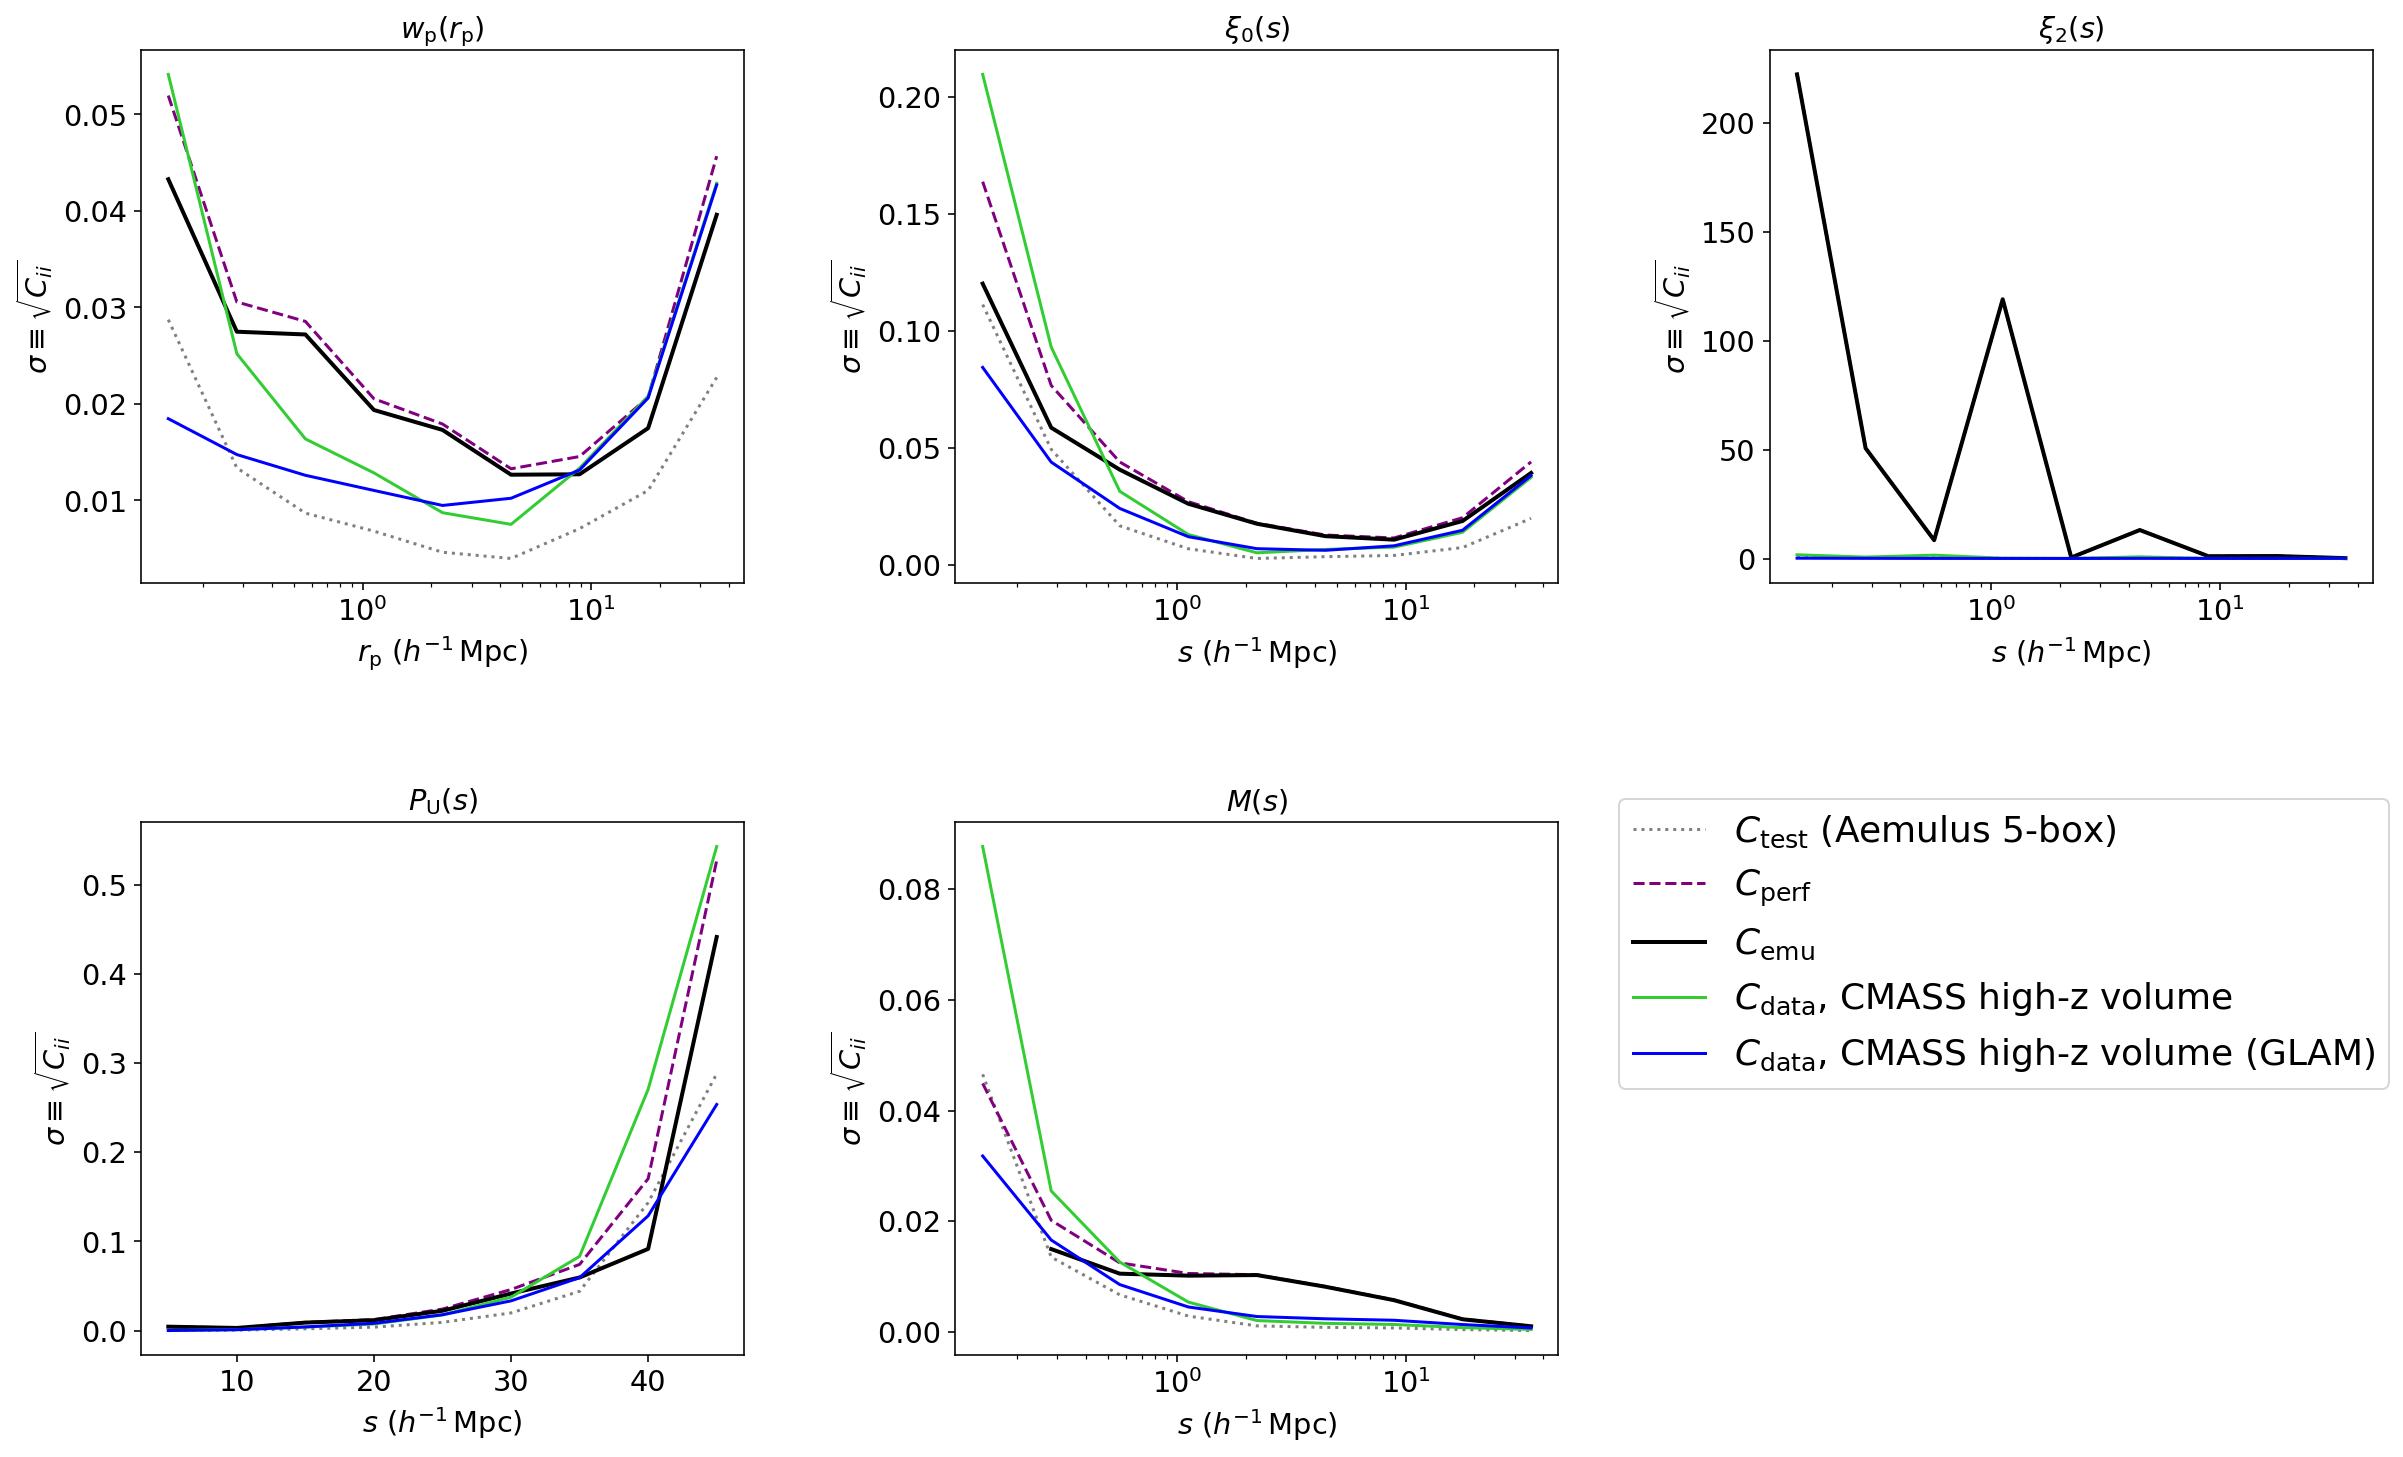

In [52]:
%matplotlib inline
statistics = ['wp', 'xi', 'xi2', 'upf', 'mcf']
mock_tag = '_aemulus_fmaxmocks_test'
cov_tag_extra = ''

fig = plt.figure(figsize=(20, 12))
outer = gridspec.GridSpec(2, 3, wspace=0.35, hspace=0.45)

vol_cmass_highz = 1.63
vol_aem = 1.05**3

for i, statistic in enumerate(statistics):
        
    stat_str = statistic
    cov_tag = mock_tag
    cov_aemulus_fn = f"{cov_dir}/cov{cov_tag}_{stat_str}{errtag}.dat"
    cov_aemulus = np.loadtxt(cov_aemulus_fn)
    cov_aemulus_5box = cov_aemulus*(1/5)
    
    cov_tag = 'emuperf'+mock_tag+cov_tag_extra
    cov_emuperf_fn = f"{cov_dir}/cov_{cov_tag}_{stat_str}{errtag}.dat"
    cov_emuperf = np.loadtxt(cov_emuperf_fn)

    cov_tag = 'smoothgauss_emuperf'+mock_tag+cov_tag_extra
    cov_emuperf_smooth_fn = f"{cov_dir}/cov_{cov_tag}_{stat_str}{errtag}.dat"
    cov_emuperf_smooth = np.loadtxt(cov_emuperf_smooth_fn)
    
    #cov_combined_fn = f"{cov_dir}/cov_combined{mock_tag}{cov_tag_extra}_uchuuglam_smooth_{stat_str}.dat"
    #cov_combined = np.loadtxt(cov_combined_fn)
    
    #plt.figure()
    ax = plt.Subplot(fig, outer[i])

    ax.plot(r_dict[statistic], np.sqrt(np.diag(cov_aemulus_5box)), color='grey', ls=':', 
            label=r'$C_\mathrm{test}$ (Aemulus 5-box)')
    ax.plot(r_dict[statistic], np.sqrt(np.diag(cov_emuperf_smooth)), color='purple', label='$C_\mathrm{perf}$', ls='--')
    
    cov_emu = cov_emuperf_smooth - cov_aemulus_5box
    ax.plot(r_dict[statistic], np.sqrt(np.diag(cov_emu)), color='black', lw=2, label='$C_\mathrm{emu}$')
    
    cov_cmass = vol_aem/vol_cmass_highz * cov_aemulus
    ax.plot(r_dict[statistic], np.sqrt(np.diag(cov_cmass)), color='limegreen', label=r'$C_\mathrm{data}$, CMASS high-z volume')

    L_glam = 1. #Gpc/h
    vol_glam = L_glam**3
    cov_glam_fn = f'{cov_dir}/cov_glam_{stat_str}.dat'
    cov_glam = np.loadtxt(cov_glam_fn)
    cov_cmass_glam = vol_glam/vol_cmass_highz * cov_glam
    ax.plot(r_dict[statistic], np.sqrt(np.diag(cov_cmass_glam)), color='blue', 
            label=r'$C_\mathrm{data}$, CMASS high-z volume (GLAM)')
    
    ax.set_title(stat_labels[statistic])
    ax.set_xlabel(r_labels[statistic])
    ax.set_ylabel(r'$\sigma \equiv \sqrt{C_{ii}}$')

    ax.set_xscale(scale_dict[statistic][0])

    fig.add_subplot(ax)
    
handles_top, labels_top = ax.get_legend_handles_labels()
legend_top = plt.legend(handles=handles_top, fontsize=18, loc=(1.1, 0.5))

For xi2, both Cemu and Cperf are super high; others are order 1